First of all we need all the necessary librarys to run this beauty!

In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from random import randrange
import os

Open and read the csv with all the audio information

In [4]:
audioPath = r"F:\labeled_audio_data.csv"
dataFrame = pd.read_csv(audioPath)
dataDictionary = dataFrame.to_dict()
print(dataDictionary.keys())

dict_keys(['Unnamed: 0', 'filename', 'mainSound', 'length', 'sampleRate', 'quality', 'isCut', 'isMixed', 'isChecked', 'threat', 'salience', 'importance'])


Now just use a snippet of the data for now,
This is to be RAM friendly and for testing purposes.
The Training and Test Data will be a list containing a list that looks like the following:
(filename, mainsound, spectrogram, threat, salience, importance)
filename is a string of the filename
mainsound is a string of the sound category
Spectrogram holds a numpy array of the log spectrogram
threat, salience and importance are single numbers and the output values

In [41]:
numAudios = 1000 #Number of audiofiles to train with

allFileNames = list(dataDictionary['filename'].values())
allMainSound = list(dataDictionary['mainSound'].values())
allThreat = list(dataDictionary['threat'].values())
allSalience = list(dataDictionary['salience'].values())
allImportance = list(dataDictionary['importance'].values())

training_data = []

def createTrainingData():
    for audioFile in range(numAudios):
        filename = allFileNames[audioFile]
        #Load the spectrogram
        try:
            specFilePath = os.path.join(specPath, (filename+".npz"))
            spectrogramNP = np.load(specFilePath)
            spectrogram = spectrogramNP[spectrogramNP.files[0]]
            spectrogram = spectrogram[0]
        except:
            spectrogram = []
        #Load the target values
        mainSound  = allMainSound[audioFile]
        threat     = allThreat[audioFile]
        salience   = allSalience[audioFile]
        importance = allImportance[audioFile]
        
        training_data.append([filename, mainSound, spectrogram, threat, salience, importance])
        
createTrainingData()

del allFileNames, allMainSound, allThreat, allSalience, allImportance 

Lets plot a random spectrogram!

-_cK_mzY5wo_50  :  siren


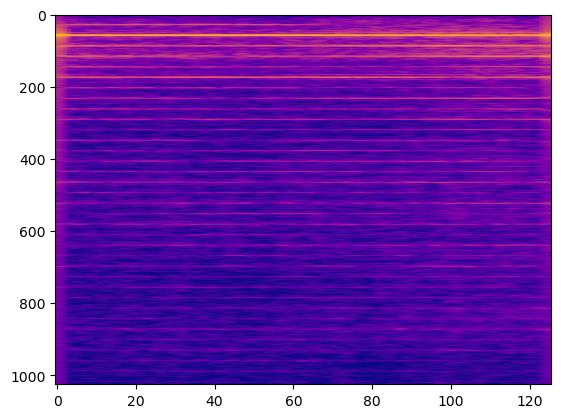

In [70]:
audioToPick = randrange(0,numAudios,1)
print(training_data[audioToPick][0], " : ",  training_data[audioToPick][1])
plt.imshow(training_data[audioToPick][2], cmap="plasma", aspect="auto")